**[Machine Learning for Insights Home Page](kaggle.com/learn/ml-insights).**

---

# Partial Dependence Plots

While feature importance shows what variables most affect predictions, partial dependence plots give us more detail about how a feature affects predictions.

This is useful to answer questions like:

* Controlling for all other house features, what impact do longitude and latitude have on predicted home prices? To restate this, how would similar houses in different neighborhoods have different predicted prices.

* Are predicted health differences between two groups due to differences in their diets, or due to some other factor?


If you are familiar with linear or logistic regression models, partial dependence plots can be interepreted similarly to the coefficients in those models.  Though partial dependence plots can capture far more complex patterns than classical model coefficients.  If you aren't familiar with linear or logistic regressions, don't worry about this comparison.

We will show a couple examples, explain the interpretation of these plots, and then review the code to create these plots.

# How it Works

Like permutation importance, **partial dependence plots are calculated after a model has been fit.**  The model is fit on real data in the standard way.

Then we consider a row of raw data. For concreteness, we'll go back to the Soccer/Football example. 

A single row might describe a team with features like
- Scored two goals 
- Made 300 passes
- Possessed the ball for 60% of the game
- etc.

We'll use the model to predict the target with this data, but we'll iteratively change the number of goals scored.  We first predict the probability of winning the **Player of the Game** when the number of goals is changed to 0. Then we'll predict with 1 goal. Then with 2 goals. And so on.  

We trace out how predicted probability of the target (on the vertical axis) changes as we move from fewer goals to more goals (on the horizontal axis).

So far, we've discussed only a single team from the raw data.  Interactions between features may cause the plot from this single team to be atypical.  So, we repeat that mental experiment with other rows of data, and we plot the average probability of the target on the vertical axis.

Once we've done this for one feature (number of goals scored), we can repeat it for other features.

You'll see some negative numbers. That doesn't mean the model predicted a negative probability. Instead it means that value of a feature causes a decreased prediction.

# Code Example

We need a model to calculate partial dependence plots. Model building still isn't our focus, so we'll use a rudimentary model.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

Here is the code to create the partial dependence plot.

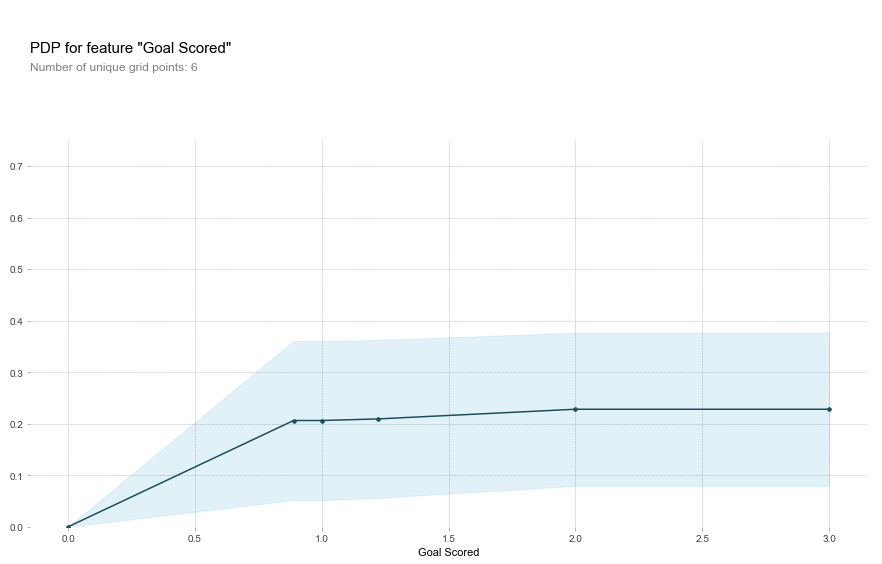

In [15]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

fname_to_plot = 'Goal Scored'
pdp_goals = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature=fname_to_plot)

pdp.pdp_plot(pdp_goals, fname_to_plot)
plt.show()

From this, we learn the model doesn't thinks a team needs at least one goal to win player of the game. But once the team has that single goal, their goal count doesn't affect the prediction dramatically.

Here is a second example:

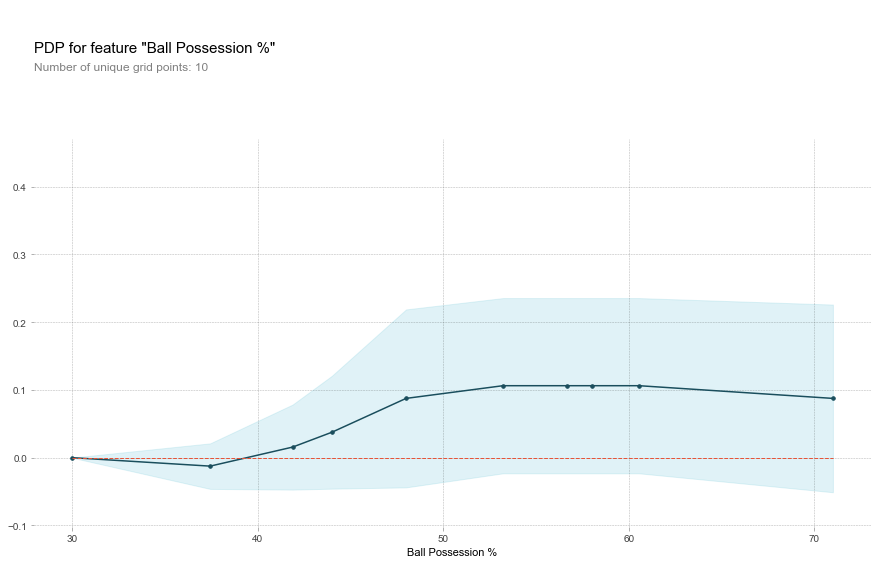

In [11]:
fname = 'Ball Possession %'
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature=fname)

pdp.pdp_plot(pdp_dist, fname)
plt.show()

A model reflects the patterns in the dataset used to build it. And there is some randomness or chance in a summary of a limited size dataset. So you generally shouldn't worry too much about very small fluctations, like you see here going from 30% to about 38%. Instead the main takeaway is that going from 40% ball possession to 50% increases the likelihood of having the player of the game.  But it is largely flat below 40% and again flat above 50%.

# Partial Dependence Plots with Interactions


EXPLANATION HERE:

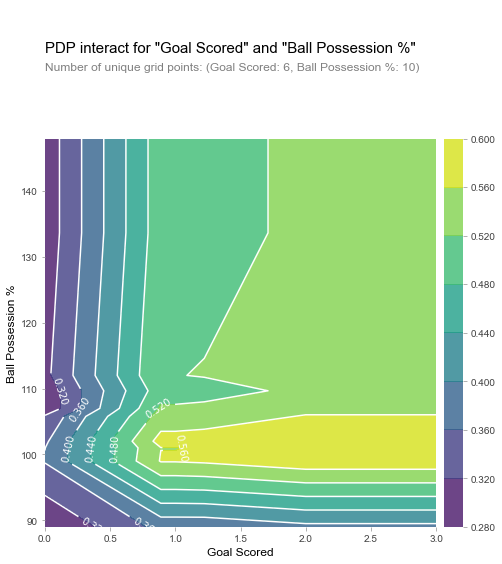

In [14]:
inter1  =  pdp.pdp_interact(model=my_model, dataset=val_X, model_features=feature_names, features=['Goal Scored', 'Distance Covered (Kms)'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['Goal Scored', 'Ball Possession %'], plot_type='contour')
plt.show()


# Your Turn
Now you get to create and interpret some partial dependence plots.

---
**[Course Home Page](https://www.kaggle.com/learn/ml-insights)**